In [1]:
import gudhi
import matplotlib.pyplot as plt
import numpy as np
import math
from tabulate import tabulate
from scipy.spatial.distance import cdist

In [2]:
def visualize_points(points):    
    
    pointsx = [points[i][0] for i in range(len(points))]
    pointsy = [points[i][1] for i in range(len(points))]

    plt.plot(pointsx, pointsy, 'o', markersize = 2)

In [3]:
def VR(points, threshold):
    
    # threshold = umbral de distancia máximo para conectar puntos en el complejo de Vietoris-Rips
    
    # Crear el complejo de Vietoris-Rips
    rips_complex = gudhi.RipsComplex(points = points, max_edge_length = threshold)
    
    # Calcular el complejo de Vietoris-Rips
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

    # Obtener los símplices del complejo 
    all_simplices = list(simplex_tree.get_filtration())
    
    diagram = simplex_tree.persistence()
    
    return all_simplices, diagram

In [4]:
def visualize_VR(points, threshold, all_simplices):
    
    pointsx = [points[i][0] for i in range(len(points))]
    pointsy = [points[i][1] for i in range(len(points))]
    
    #plt.axis("square")
    #plt.axis([min(pointsx)-threshold/2, max(pointsx)+threshold/2, min(pointsy)-threshold/2, max(pointsy)+threshold/2])
    
    visualize_points(points)
    
    for i in range(len(all_simplices)):
        
        if len(all_simplices[i][0])==2 and all_simplices[i][1] <= threshold:
            p = all_simplices[i][0][0] 
            q = all_simplices[i][0][1]
            P = points[p]
            Q = points[q]
            plt.plot((P[0],Q[0]), (P[1],Q[1]), 'go-', linewidth = 1, markersize = 2)
        elif len(all_simplices[i][0])==3 and all_simplices[i][1] <= threshold:
            p = all_simplices[i][0][0] 
            q = all_simplices[i][0][1]
            r = all_simplices[i][0][2]
            P = points[p]
            Q = points[q]
            R = points[r]
            plt.fill([P[0],Q[0],R[0]],[P[1],Q[1],R[1]], color = 'green', alpha = 0.3)

            
    #for j in range(len(points)):
    #    c = plt.Circle(points[j], threshold/2, fill = False, color = 'red' )
    #    plt.gca().add_artist(c)

In [5]:
def visualize_complexes(list_T, points, rows, columns):
    
    #plt.figure(figsize = (8,4))
    plt.subplots_adjust(left = None, bottom = None, right = 2, top = None, wspace = 0.5, hspace = 0.5)
    
    #n = len(list_T) suponemos siempre 8 umbrales
    n = rows*columns
    
    for i in range(n):
        
        threshold = list_T[i] 
        all_simplices, diagram = VR(points, threshold)
        
        plt.subplot(rows,columns,i+1)
        plt.title('Umbral ' + str(threshold)) 
        plt.xticks([]), plt.yticks([])
        visualize_VR(points, threshold, all_simplices)  

In [6]:
#def dist(p,q): 
    
#    d = math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
    
#    return d

In [7]:
#def threshold_max(points):
    
#    n = len(points)
#    T = min([max([dist(points[i],points[j]) for j in range(n)]) for i in range(n)])

#    return T

In [8]:
def threshold_max(points):
    
    distance_matrix = cdist(points, points)
    T = np.max(distance_matrix)

    return T

In [9]:
def bar_length(diagram):

    L_H0 = [interval[1][1] for interval in diagram if interval[0]==0] #if not math.isinf
    m = max(numero for numero in L_H0 if numero != float('inf'))
    for i in range(len(L_H0)):
        if math.isinf(L_H0[i]):
            L_H0[i] = m+1
            
    L_H1 = [interval[1] for interval in diagram if interval[0]==1]

    return L_H0,L_H1

In [10]:
def draw_barcode(diagram,dim):
    
    M = max([interval[1][1] for interval in diagram if interval[1][1]!= float('inf')])

    if dim == 'dim01':
        intervals = [item[1] for item in diagram]
    elif dim == 'dim0':
        intervals = [item[1] for item in diagram if item[0]==0]
    else:
        intervals = [item[1] for item in diagram if item[0]==1]

    # Coordenadas para el gráfico
    y_pos = range(len(intervals))  # Índices en el eje y
    x_start = [x[0] for x in intervals]  # Inicio de las barras
    x_end = [x[1] for x in intervals]    # Fin de las barras

    # Crear la figura
    #plt.figure(figsize=(4,4))

    # Dibujar las barras horizontales
    for i, (start, end) in enumerate(zip(x_start, x_end)):
        if end != float('inf'):  # No dibujar si el intervalo es infinito
            plt.hlines(y=i, xmin=start, xmax=end, color='blue', linewidth=2)
        else:
            #plt.hlines(y=i, xmin=start, xmax=M+0.5, color='blue', linewidth=2)
            plt.text(0, i, "Inf", color='red')  # Marcar intervalos infinitos

    # Personalizar el gráfico
    #plt.yticks(y_pos, [f"Barra {i+1}" for i in y_pos])  # Etiquetas del eje y
    plt.gca().invert_yaxis()
    plt.yticks([])
    plt.xlabel("Valores")
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

In [11]:
# simplex = lista con los vértices = [v0,v1,...,vn]
# una cadena se representa por una lista de listas, por ejemplo, el borde del triángulo [v0,v1,v2] sería la cadena 
# [[v0,v1], [v0,v2], [v1,v2]].

def borde(simplex):
    
    if len(simplex)==1:
        b = 0
    elif len(simplex) == 2:
        b = [[simplex[0]],[simplex[1]]]
    else:
        b = [[simplex[0],simplex[1]], [simplex[0],simplex[2]], [simplex[1],simplex[2]]] 
    
    return b 

def borde_chain(chain):

    b = []
    for s in chain:
        b = b + borde(s)

    return simplify(b)

        

########################################################################################

# eliminamos de una cadena pares de elementos iguales ya que estamos trabajando en Z2
# por ejemplo, simplify([[1,2],[3,4],[1,2]]) = [[3,4]]

def simplify(L):
    
    L2 = []    
    for i in range(len(L)):        
        if L.count(L[i]) % 2 != 0:
            L2.append(L[i])

    return L2

########################################################################################

# recibe una lista con los simplices obtenidos de la filtración de Vietoris-Rips
# all_simplices, diagram = VR(points, threshold)
# simplices = [simplex[0] for simplex in all_simplices]

def ATmodel(simplices,all_simplices):

    C = {}
    
    #Inicializamos
    f = {str(simplices[i]): [simplices[i]] for i in range(len(simplices)) if len(simplices[i])==1}
    for i in range(len(simplices)):
        if len(simplices[i]) > 1:
            f[str(simplices[i])] = []
        
    g = {str(simplices[i]): [simplices[i]] for i in range(len(simplices)) if len(simplices[i])==1}

    phi = {str(simplices[i]): [] for i in range(len(simplices))}
    
    for i in range(len(simplices)):
    
        if len(simplices[i])>1:
            
            s = simplices[i]
            bs = borde(s)
        
            print('simplice',s)
            #print('borde del simplice',bs)
        
            fbs = []
            for j in range(len(bs)):
                fbs = fbs + f[str(bs[j])]
            fbs = simplify(fbs)
        
            #print('f',f)
            #print('f del borde del simplice',fbs)
        
            phibs = []
            for j in range(len(bs)):
                phibs = phibs + phi[str(bs[j])]
            phibs = simplify(phibs)
        
            if len(fbs) == 0:
                f[str(s)] = [s]
                g[str(s)] = simplify([s] + phibs)
                phi[str(s)] = []
                #print(s,'crea el ciclo',g[str(s)])
                if len(g[str(s)])>3 and len(g[str(s)][0])==2:
                    elemento = s
                    valor = None
                    for clave, valor_asociado in all_simplices:
                        if clave == elemento:
                            valor = (valor_asociado,'inf')
                            break
                    C[str(g[str(s)])]=valor
                    #print(g[str(s)],valor)
            
            else:
                s_ultimo = fbs[-1]
                #print('g',g)
                #print('eliminamos',s_primero)
                #Se elimina de g
                #print(s,'destruye el ciclo',g[str(s_ultimo)])
                if len(g[str(s_ultimo)])>3 and len(g[str(s_ultimo)][0])==2:
                    elemento = s
                    valor = None
                    for clave, valor_asociado in all_simplices:
                        if clave == elemento:
                            valor = valor_asociado
                            break
                    #print('valor',valor)
                    #print(C[str(g[str(s_ultimo)])][1])
                    #if C[str(g[str(s_ultimo)])][1] == valor:
                    #    del C[str(g[str(s_ultimo)])]
                    #else:
                    C[str(g[str(s_ultimo)])] = (C[str(g[str(s_ultimo)])][0],valor)
                del g[str(s_ultimo)]
                #hay que cambiar la f y la phi de cualquier simplice que contenga s_ultimo en f
                for clave, valor in f.items():
                    if s_ultimo in valor:                    
                        new = simplify(f[clave] + fbs) 
                        f[clave] = new
                        phi[clave] = simplify(phi[clave] + [s] + phibs) 
    
    H = g.values()
    
    return f,g,phi,H,C

In [12]:
def ATmodel2(all_simplices):

    simplices = [simplex[0] for simplex in all_simplices]

    C = {}
    
    #Inicializamos
    f = {str(simplices[i]): [simplices[i]] for i in range(len(simplices)) if len(simplices[i])==1}
    for i in range(len(simplices)):
        if len(simplices[i]) > 1:
            f[str(simplices[i])] = []
        
    g = {str(simplices[i]): [simplices[i]] for i in range(len(simplices)) if len(simplices[i])==1}

    phi = {str(simplices[i]): [] for i in range(len(simplices))}
    
    for i in range(len(simplices)):
    
        if len(simplices[i])>1: #no cuenta los vértices
            
            s = simplices[i]
            instant_s = next((v for k, v in all_simplices if k == s), None)
            bs = borde(s)
        
            #print('simplice',s)
            #print('borde del simplice',bs)
        
            fbs = []
            for j in range(len(bs)):
                fbs = fbs + f[str(bs[j])]
            fbs = simplify(fbs)
        
            #print('f',f)
            #print('f del borde del simplice',fbs)
        
            phibs = []
            for j in range(len(bs)):
                phibs = phibs + phi[str(bs[j])]
            phibs = simplify(phibs)
        
            if len(fbs) == 0:
                f[str(s)] = [s]
                g[str(s)] = simplify([s] + phibs)
                phi[str(s)] = []
                #if len(g[str(s)])>3 and len(g[str(s)][0])==2:
                #   print(s,'crea el ciclo',g[str(s)],'en el instante',instant_s)
                if len(g[str(s)])>3 and len(g[str(s)][0])==2:
                    C[str(g[str(s)])] = (instant_s,'inf')           
            else:
                s_ultimo = fbs[-1]
                #print('g',g)
                #print('eliminamos',s_primero)
                #Se elimina de g
                #buscamos en C el ciclo y cambiamos el 'inf' por instant_s
                #if len(g[str(s_ultimo)])>3 and len(g[str(s_ultimo)][0])==2:
                #print(s,'destruye el ciclo',g[str(s_ultimo)],'en el instante',instant_s)
                c = str(g[str(s_ultimo)]) #ciclo que se destruye
                if c in C:
                    if C[str(g[str(s_ultimo)])][0]==instant_s:
                        del C[str(g[str(s_ultimo)])]
                    else:
                        C[str(g[str(s_ultimo)])] = (C[str(g[str(s_ultimo)])][0],instant_s)                    
                del g[str(s_ultimo)]
                #hay que cambiar la f y la phi de cualquier simplice que contenga s_ultimo en f
                for clave, valor in f.items():
                    if s_ultimo in valor:                    
                        new = simplify(f[clave] + fbs) 
                        f[clave] = new
                        phi[clave] = simplify(phi[clave] + [s] + phibs) 
    
    H = g.values()
    #print(C)
    
    return f,g,phi,H,C

In [13]:
def ATmodel3(f,g,phi,C,new_simplices):

    #all_simplices
    #for s in all_simplices:
    #    print(s)
    #s = ([0,1,2], 1.0) -> el triángulo 012 nace en el instante 1.0
    
    simplices = [simplex[0] for simplex in new_simplices]

    #C = {}
    
    #Inicializamos
    f = {str(simplices[i]): [simplices[i]] for i in range(len(simplices)) if len(simplices[i])==1}
    for i in range(len(simplices)):
        if len(simplices[i]) > 1:
            f[str(simplices[i])] = []
        
    g = {str(simplices[i]): [simplices[i]] for i in range(len(simplices)) if len(simplices[i])==1}

    phi = {str(simplices[i]): [] for i in range(len(simplices))}
    
    for i in range(len(simplices)):
    
        if len(simplices[i])>1: #no cuenta los vértices
            
            s = simplices[i]
            instant_s = next((v for k, v in all_simplices if k == s), None)
            bs = borde(s)
        
            #print('simplice',s)
            #print('borde del simplice',bs)
        
            fbs = []
            for j in range(len(bs)):
                fbs = fbs + f[str(bs[j])]
            fbs = simplify(fbs)
        
            #print('f',f)
            #print('f del borde del simplice',fbs)
        
            phibs = []
            for j in range(len(bs)):
                phibs = phibs + phi[str(bs[j])]
            phibs = simplify(phibs)
        
            if len(fbs) == 0:
                f[str(s)] = [s]
                g[str(s)] = simplify([s] + phibs)
                phi[str(s)] = []
                #if len(g[str(s)])>3 and len(g[str(s)][0])==2:
                #    print(s,'crea el ciclo',g[str(s)],'en el instante',instant_s)
                if len(g[str(s)])>3 and len(g[str(s)][0])==2:
                    C[str(g[str(s)])] = (instant_s,'inf')           
            else:
                s_ultimo = fbs[-1]
                #print('g',g)
                #print('eliminamos',s_primero)
                #Se elimina de g
                #buscamos en C el ciclo y cambiamos el 'inf' por instant_s
                #if len(g[str(s_ultimo)])>3 and len(g[str(s_ultimo)][0])==2:
                #print(s,'destruye el ciclo',g[str(s_ultimo)],'en el instante',instant_s)
                c = str(g[str(s_ultimo)])
                if c in C:
                    if C[str(g[str(s_ultimo)])][0]==instant_s:
                        del C[str(g[str(s_ultimo)])]
                    else:
                        C[str(g[str(s_ultimo)])] = (C[str(g[str(s_ultimo)])][0],instant_s)                    
                del g[str(s_ultimo)]
                #hay que cambiar la f y la phi de cualquier simplice que contenga s_ultimo en f
                for clave, valor in f.items():
                    if s_ultimo in valor:                    
                        new = simplify(f[clave] + fbs) 
                        f[clave] = new
                        phi[clave] = simplify(phi[clave] + [s] + phibs) 
    
    H = g.values()
    
    return f,g,phi,H,C

In [14]:
import ast

def visualize_cycles(points, C2):

    # Crear un colormap para asignar colores automáticamente
    colormap = plt.cm.viridis  # Puedes elegir cualquier colormap como 'plasma', 'inferno', 'cool', etc.
    colores = [colormap(i / len(C2)) for i in range(len(C2))]  # Genera colores para cada segmento
    
    pointsx = [points[i][0] for i in range(len(points))]
    pointsy = [points[i][1] for i in range(len(points))]
    
    visualize_points(points)

    k = 0
    for h in C2:

        h = ast.literal_eval(h)
        
        for j in range(len(h)):
            l = h[j] #[p,q] linea que une los puntos en las posiciones p y q de points            
            plt.plot((points[l[0]][0],points[l[1]][0]), (points[l[0]][1],points[l[1]][1]), color=colores[k], linewidth = 1, markersize = 2)

        k = k+1

In [15]:
def visualize_cycles2(points, H):
    
    pointsx = [points[i][0] for i in range(len(points))]
    pointsy = [points[i][1] for i in range(len(points))]
    
    visualize_points(points)
    
    for h in H:
        
        if len(h) > 1 and len(h[0])==1 or len(h[0])==2:
            
            for j in range(len(h)):
                
                l = h[j] #[p,q] linea que une los puntos en las posiciones p y q de points            
                plt.plot((points[l[0]][0],points[l[1]][0]), (points[l[0]][1],points[l[1]][1]), 'ro-', linewidth = 1, markersize = 2)

In [16]:
def entropy(L):  
    #-------------------------------------------------
    # INPUT: L = np.array with the lengths of the bars
    # OUTPUT: Entropy of L
    #-------------------------------------------------
    S = np.sum(L)
    p = L/S       
    e = -np.sum(p * np.log(p))        
    return e

def entropy_norm(L):
    #-------------------------------------------------
    # INPUT: L = np.array with the lengths of the bars
    # OUTPUT: Normalized entropy of L
    #-------------------------------------------------
    en = entropy(L)/np.log(len(L)) 
    return en

In [17]:
def info_cycles(all_simplices, diagram):

    cycles = []

    intervals = [item[1] for item in diagram if item[0]==1]
    intervals = sorted(intervals, key=lambda x: x[0])
    births = [interval[0] for interval in intervals]

    headers = ["Cycle", "Length", "Birth", "Death","Life time"]
    rows = []

    for i in range(len(births)):
        simplices_t = [(s, inst) for s, inst in all_simplices if inst <= births[i]]
        #all_simplices, diagram = VR(points, t)
        #print('Instant', births[i])
        f,g,phi,H,C = ATmodel2(simplices_t)
        c = ast.literal_eval(list(C.keys())[-1])
        cycles.append(c)
        l = len(c)
        lt = intervals[i][1]-intervals[i][0]
    
        row = ['cycle '+ str(i+1),l,births[i],intervals[i][1],lt]
        rows.append(row)

    table = tabulate(rows, headers, tablefmt='fancy_grid', numalign="left", stralign="left")
    print(table)

    return cycles

In [18]:
import random

def draw_cycles(points, cycles):

    #plt.figure(figsize=(4,4))
    
    color = [plt.cm.rainbow(random.random()) for _ in range(len(cycles))]

    i = 0
    for c, col in zip(cycles, color):
        #plt.figure(figsize=(4,4))
        visualize_points(points)
        for j in range(len(c)):
            l = c[j] #[p,q] linea que une los puntos en las posiciones p y q de points            
            plt.plot((points[l[0]][0],points[l[1]][0]), (points[l[0]][1],points[l[1]][1]), color = col, linewidth = 1, markersize = 2)
        i = i+1

In [19]:
def cycles_homologous(c1,c2,all_simplices):

    s1 = simplify(c1 + c2)
    s2 = list(set(elemento for sublista in s1 for elemento in sublista))

    return any(set(par[0]) == set(s2) for par in all_simplices)

# Example:

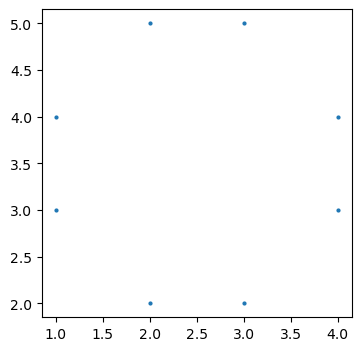

In [21]:
points = [(2, 2), (3, 2), (4, 3), (4, 4), (3, 5), (2, 5), (1, 4), (1, 3)]
plt.figure(figsize=(4,4))
visualize_points(points)

In [22]:
all_simplices, diagram = VR(points, threshold_max(points))

In [23]:
cycles = info_cycles(all_simplices, diagram)

╒═════════╤══════════╤═════════╤═════════╤═════════════╕
│ Cycle   │ Length   │ Birth   │ Death   │ Life time   │
╞═════════╪══════════╪═════════╪═════════╪═════════════╡
│ cycle 1 │ 8        │ 1.41421 │ 3       │ 1.58579     │
╘═════════╧══════════╧═════════╧═════════╧═════════════╛


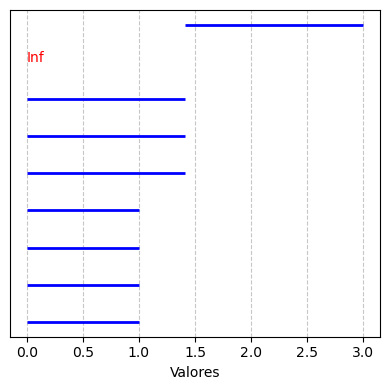

In [24]:
plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim01')

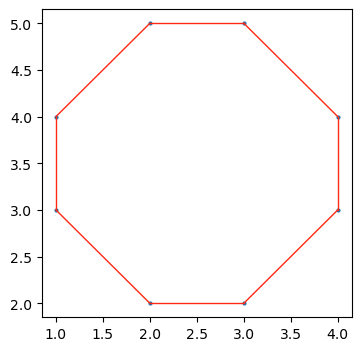

In [25]:
plt.figure(figsize=(4,4))
draw_cycles(points, cycles)

# Example:

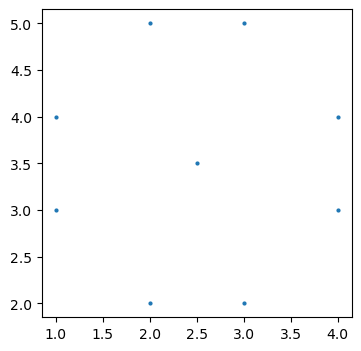

In [27]:
points = [(2, 2), (3, 2), (4, 3), (4, 4), (3, 5), (2, 5), (1, 4), (1, 3), (2.5,3.5)]
plt.figure(figsize=(4,4))
visualize_points(points)

In [28]:
all_simplices, diagram = VR(points, threshold_max(points))

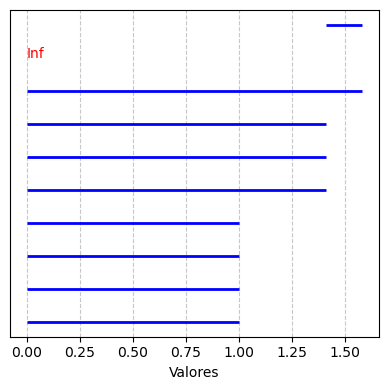

In [29]:
plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim01')

╒═════════╤══════════╤═════════╤═════════╤═════════════╕
│ Cycle   │ Length   │ Birth   │ Death   │ Life time   │
╞═════════╪══════════╪═════════╪═════════╪═════════════╡
│ cycle 1 │ 8        │ 1.41421 │ 1.58114 │ 0.166925    │
╘═════════╧══════════╧═════════╧═════════╧═════════════╛


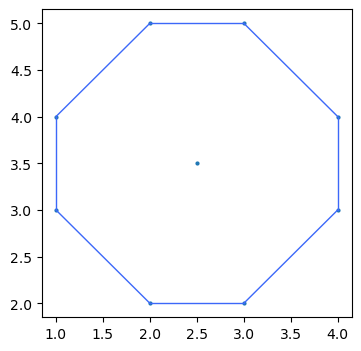

In [30]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points, cycles)

# Example:

In [32]:
#fijo una matriz de puntos ya que cada vez que se ejecuta se crea una distinta de forma aleatoria

In [202]:
points = np.array([[ 4.00636709e-01,  1.44241145e+00],
       [ 2.85296382e-01,  1.26053173e+00],
       [ 2.89371341e-01,  1.36456812e+00],
       [ 7.47684167e-01,  1.23493188e+00],
       [ 7.40716059e-01,  1.05400420e+00],
       [ 9.76498246e-01,  8.20578596e-01],
       [ 8.61947255e-01,  8.40699972e-01],
       [ 1.22368911e+00,  8.90179566e-01],
       [ 1.27912722e+00,  5.72758451e-01],
       [ 1.08516270e+00,  7.14760992e-01],
       [ 1.31782058e+00,  4.83206640e-01],
       [ 1.17003416e+00,  2.42990679e-01],
       [ 1.35433311e+00,  5.07417815e-01],
       [ 1.13941021e+00,  3.90023334e-01],
       [ 1.11996981e+00,  9.04762800e-02],
       [ 9.89367216e-01, -1.82902287e-01],
       [ 1.26102140e+00,  1.63726431e-04],
       [ 1.03114826e+00, -4.55873955e-02],
       [ 8.63095529e-01, -5.33384811e-01],
       [ 1.03785663e+00, -3.85303474e-01],
       [ 8.03370182e-01, -6.62433395e-01],
       [ 9.72831916e-01, -7.01813195e-01],
       [ 6.72607535e-01, -7.81979853e-01],
       [ 3.34297342e-01, -5.80210718e-01],
       [ 5.75440471e-01, -5.72520124e-01],
       [ 2.83221752e-01, -5.57343331e-01],
       [ 1.67668560e-01, -9.30685144e-01],
       [-1.24330528e-01, -9.09957849e-01],
       [-9.20861094e-02, -6.22179763e-01],
       [-1.46323693e-01, -6.56283387e-01],
       [-1.88800863e-01, -4.30513008e-01],
       [-4.81736949e-01, -2.94458571e-01],
       [-3.56399057e-01, -2.75514810e-01],
       [-5.48831397e-01, -2.81762753e-01],
       [-4.90389643e-01, -2.67192964e-01],
       [-8.13272336e-01, -1.16960204e-01],
       [-5.27372839e-01,  6.12696353e-02],
       [-9.64247945e-01,  4.34291172e-01],
       [-9.67132189e-01,  2.56190324e-01],
       [-7.38114675e-01,  4.15776850e-01],
       [-6.82321051e-01,  7.49311552e-01],
       [-4.88158882e-01,  5.63797796e-01],
       [-4.46598769e-01,  8.98108225e-01],
       [-4.82557830e-01,  1.01611419e+00],
       [-2.79273265e-01,  1.11204362e+00],
       [-2.43441656e-01,  1.02115345e+00],
       [-2.48593986e-02,  9.12880180e-01],
       [-3.27523834e-01,  1.30988006e+00],
       [ 1.54221225e-01,  1.32373791e+00],
       [ 9.96053577e-04,  1.01017568e+00]])

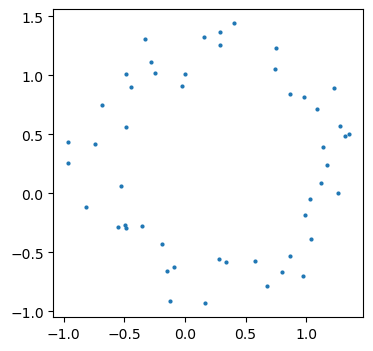

In [204]:
plt.figure(figsize=(4,4))
visualize_points(points)

In [34]:
all_simplices, diagram = VR(points, threshold_max(points))

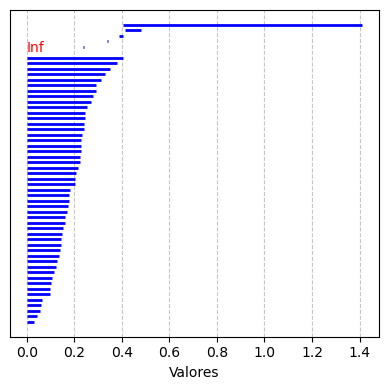

In [35]:
plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim01')

╒═════════╤══════════╤══════════╤══════════╤═════════════╕
│ Cycle   │ Length   │ Birth    │ Death    │ Life time   │
╞═════════╪══════════╪══════════╪══════════╪═════════════╡
│ cycle 1 │ 4        │ 0.237514 │ 0.239169 │ 0.00165518  │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 2 │ 4        │ 0.336904 │ 0.343703 │ 0.00679877  │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 3 │ 6        │ 0.388069 │ 0.403296 │ 0.0152276   │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 4 │ 40       │ 0.404339 │ 1.4096   │ 1.00526     │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 5 │ 7        │ 0.412417 │ 0.481022 │ 0.0686056   │
╘═════════╧══════════╧══════════╧══════════╧═════════════╛


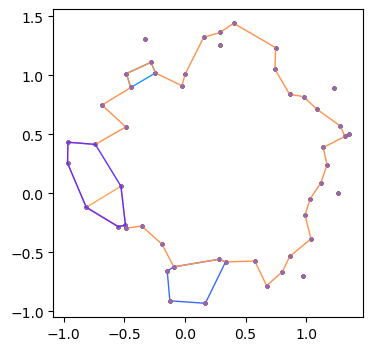

In [36]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points, cycles)

# Example:

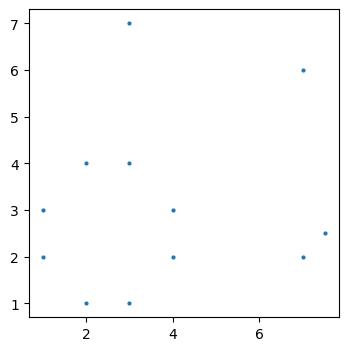

In [38]:
points = [(1,3), (1,2), (2,1), (3,1), (4,2), (4,3), (3,4), (2,4), (3,7), (7,6), (7,2), (7.5,2.5)]

plt.figure(figsize=(4,4))
visualize_points(points)

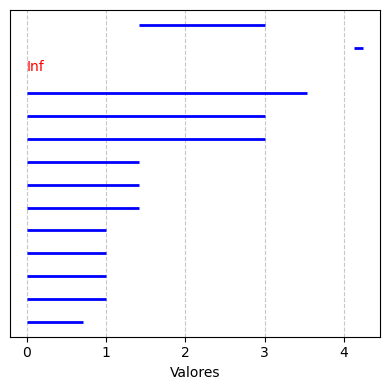

In [39]:
all_simplices, diagram = VR(points, threshold_max(points))

plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim01')

In [40]:
for s in all_simplices:
    print(s)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([10, 11], 0.7071067811865476)
([0, 1], 1.0)
([2, 3], 1.0)
([4, 5], 1.0)
([6, 7], 1.0)
([1, 2], 1.4142135623730951)
([3, 4], 1.4142135623730951)
([5, 6], 1.4142135623730951)
([0, 7], 1.4142135623730951)
([0, 2], 2.23606797749979)
([0, 1, 2], 2.23606797749979)
([1, 3], 2.23606797749979)
([1, 2, 3], 2.23606797749979)
([2, 4], 2.23606797749979)
([2, 3, 4], 2.23606797749979)
([3, 5], 2.23606797749979)
([3, 4, 5], 2.23606797749979)
([0, 6], 2.23606797749979)
([4, 6], 2.23606797749979)
([4, 5, 6], 2.23606797749979)
([1, 7], 2.23606797749979)
([0, 1, 7], 2.23606797749979)
([5, 7], 2.23606797749979)
([0, 6, 7], 2.23606797749979)
([5, 6, 7], 2.23606797749979)
([0, 3], 2.8284271247461903)
([0, 1, 3], 2.8284271247461903)
([0, 2, 3], 2.8284271247461903)
([2, 5], 2.8284271247461903)
([2, 3, 5], 2.8284271247461903)
([2, 4, 5], 2.8284271247461903)
([1, 6], 2.8284271247

╒═════════╤══════════╤═════════╤═════════╤═════════════╕
│ Cycle   │ Length   │ Birth   │ Death   │ Life time   │
╞═════════╪══════════╪═════════╪═════════╪═════════════╡
│ cycle 1 │ 8        │ 1.41421 │ 3       │ 1.58579     │
├─────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 2 │ 7        │ 4.12311 │ 4.24264 │ 0.119535    │
╘═════════╧══════════╧═════════╧═════════╧═════════════╛


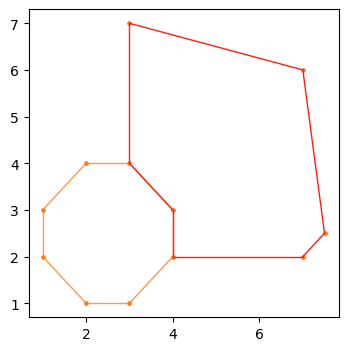

In [41]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points, cycles)

# Example:

In [43]:
def point_cloud_circle(n,e):
    
    number_of_points = n
    dx = 2*math.pi/number_of_points

    # Let us now add epsilon noise to the point cloud:
    epsilon = e

    noisy_pts = []
    for i in range(0,number_of_points):
      point = [ np.sin( i*dx ) + np.random.uniform(0,epsilon) , np.cos(i*dx) + np.random.uniform(0,epsilon) ]
      noisy_pts.append(point)

    points = np.array(noisy_pts)

    return points

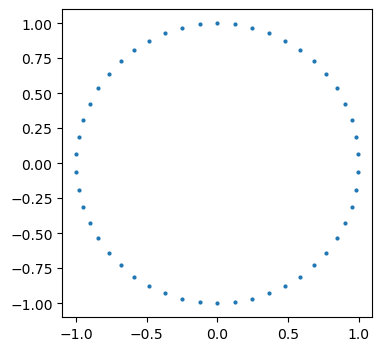

In [44]:
points = point_cloud_circle(50,0)

plt.figure(figsize=(4,4))
visualize_points(points)

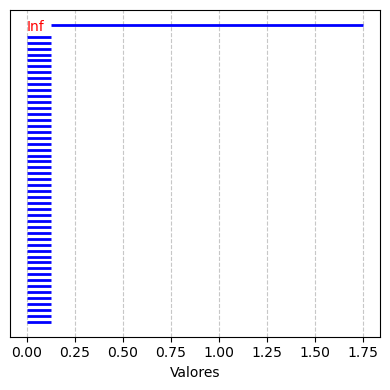

In [45]:
all_simplices, diagram = VR(points, threshold_max(points))

plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim01')

╒═════════╤══════════╤══════════╤═════════╤═════════════╕
│ Cycle   │ Length   │ Birth    │ Death   │ Life time   │
╞═════════╪══════════╪══════════╪═════════╪═════════════╡
│ cycle 1 │ 50       │ 0.125581 │ 1.75261 │ 1.62703     │
╘═════════╧══════════╧══════════╧═════════╧═════════════╛


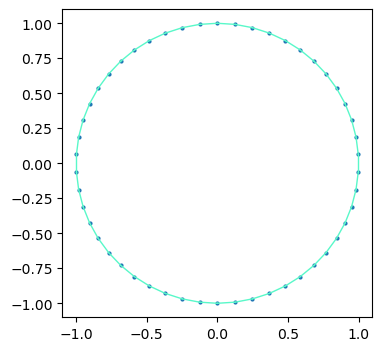

In [46]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points,cycles)

# Example:

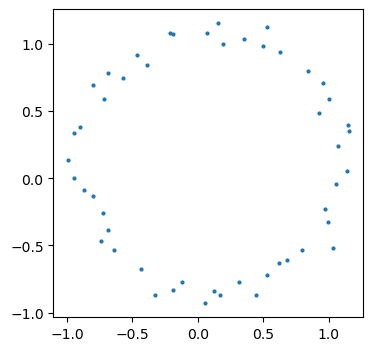

In [48]:
points = point_cloud_circle(50,0.2)

plt.figure(figsize=(4,4))
visualize_points(points)

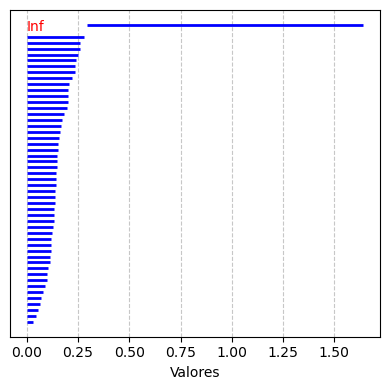

In [49]:
all_simplices, diagram = VR(points, threshold_max(points))

plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim01')

╒═════════╤══════════╤══════════╤═════════╤═════════════╕
│ Cycle   │ Length   │ Birth    │ Death   │ Life time   │
╞═════════╪══════════╪══════════╪═════════╪═════════════╡
│ cycle 1 │ 48       │ 0.295552 │ 1.6403  │ 1.34475     │
╘═════════╧══════════╧══════════╧═════════╧═════════════╛


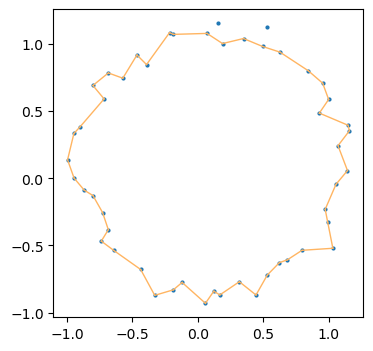

In [50]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points,cycles)

# Example:

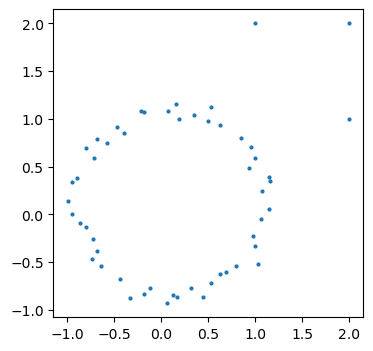

In [52]:
outlayer1 = np.array([2, 1])
outlayer2 = np.array([1, 2])
outlayer3 = np.array([2, 2])
points = np.vstack([points, outlayer1])
points = np.vstack([points, outlayer2])
points = np.vstack([points, outlayer3])

plt.figure(figsize=(4,4))
visualize_points(points)

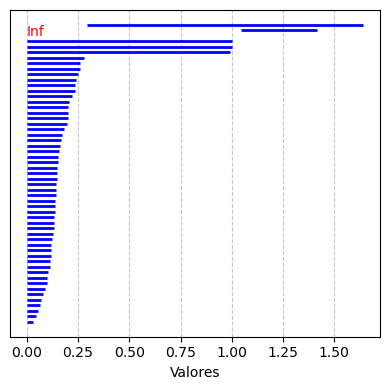

In [53]:
all_simplices, diagram = VR(points, threshold_max(points))

plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim01')

╒═════════╤══════════╤══════════╤═════════╤═════════════╕
│ Cycle   │ Length   │ Birth    │ Death   │ Life time   │
╞═════════╪══════════╪══════════╪═════════╪═════════════╡
│ cycle 1 │ 48       │ 0.295552 │ 1.6403  │ 1.34475     │
├─────────┼──────────┼──────────┼─────────┼─────────────┤
│ cycle 2 │ 11       │ 1.0439   │ 1.41421 │ 0.370317    │
╘═════════╧══════════╧══════════╧═════════╧═════════════╛


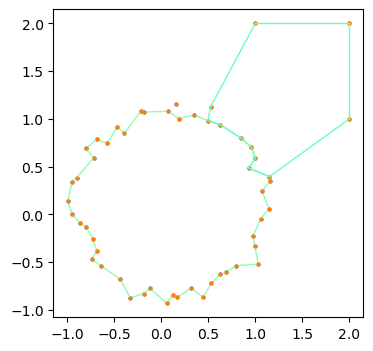

In [54]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points,cycles)

# Example:

In [56]:
points = []

# Parámetros del toro en 2D
r_interno = 3  # Radio interno del anillo
r_externo = 4  # Radio externo del anillo
n_puntos = 200  # Número de puntos aleatorios

# Generar puntos aleatorios en coordenadas polares
r = np.random.uniform(r_interno, r_externo, n_puntos)  # Radios aleatorios
theta = np.random.uniform(0, 2 * np.pi, n_puntos)     # Ángulos aleatorios

# Convertir a coordenadas cartesianas
x = r * np.cos(theta)
y = r * np.sin(theta)

points = np.vstack((x, y)).T

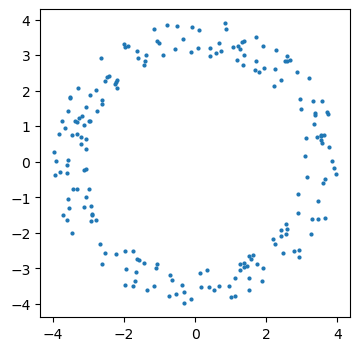

In [57]:
plt.figure(figsize=(4,4))
visualize_points(points)

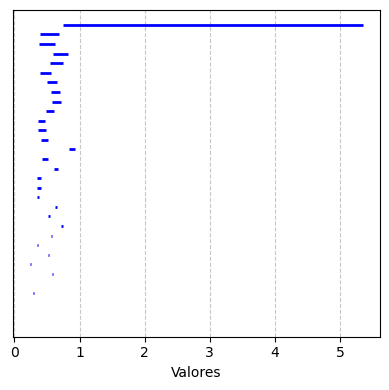

In [58]:
all_simplices, diagram = VR(points, threshold_max(points))

plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim1')

╒══════════╤══════════╤══════════╤══════════╤═════════════╕
│ Cycle    │ Length   │ Birth    │ Death    │ Life time   │
╞══════════╪══════════╪══════════╪══════════╪═════════════╡
│ cycle 1  │ 5        │ 0.240365 │ 0.254018 │ 0.0136528   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 2  │ 4        │ 0.285832 │ 0.296469 │ 0.0106373   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 3  │ 6        │ 0.339381 │ 0.382253 │ 0.0428717   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 4  │ 8        │ 0.343626 │ 0.368752 │ 0.0251262   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 5  │ 8        │ 0.348666 │ 0.409296 │ 0.0606298   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 6  │ 4        │ 0.349042 │ 0.401903 │ 0.0528608   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 7  │ 6        │ 0.354371 │ 0.473031 │ 0.118659    │
├──────────┼──────────┼──────────┼──────

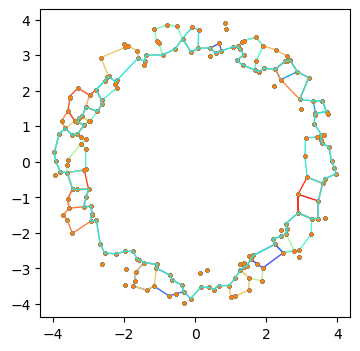

In [59]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points,cycles)

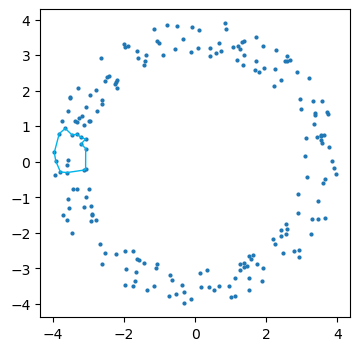

In [60]:
plt.figure(figsize=(4,4))
draw_cycles(points,[cycles[23]])

# Example:

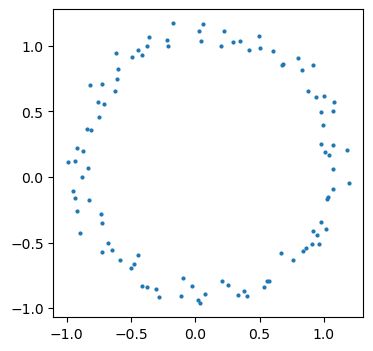

In [62]:
points02 = point_cloud_circle(100,0.2)

plt.figure(figsize=(4,4))
visualize_points(points02)

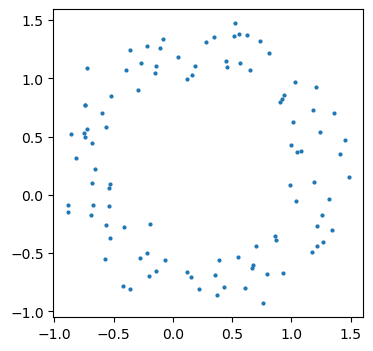

In [63]:
points05 = point_cloud_circle(100,0.5)

plt.figure(figsize=(4,4))
visualize_points(points05)

In [64]:
all_simplices02, diagram02 = VR(points02, threshold_max(points02))
all_simplices05, diagram05 = VR(points05, threshold_max(points05))

╒═════════╤══════════╤══════════╤══════════╤═════════════╕
│ Cycle   │ Length   │ Birth    │ Death    │ Life time   │
╞═════════╪══════════╪══════════╪══════════╪═════════════╡
│ cycle 1 │ 4        │ 0.088562 │ 0.098014 │ 0.00945206  │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 2 │ 5        │ 0.116016 │ 0.126916 │ 0.0108998   │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 3 │ 4        │ 0.145839 │ 0.15104  │ 0.00520099  │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 4 │ 6        │ 0.176263 │ 0.194129 │ 0.0178655   │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 5 │ 6        │ 0.185624 │ 0.214625 │ 0.0290013   │
├─────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 6 │ 79       │ 0.23081  │ 1.63212  │ 1.40131     │
╘═════════╧══════════╧══════════╧══════════╧═════════════╛


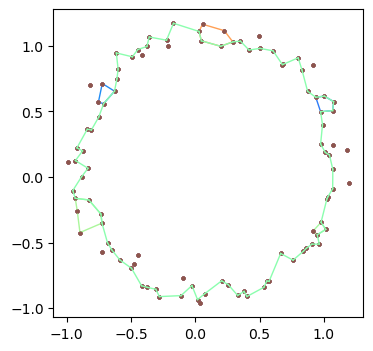

In [65]:
cycles02 = info_cycles(all_simplices02, diagram02)

plt.figure(figsize=(4,4))
draw_cycles(points02,cycles02)

╒══════════╤══════════╤══════════╤══════════╤═════════════╕
│ Cycle    │ Length   │ Birth    │ Death    │ Life time   │
╞══════════╪══════════╪══════════╪══════════╪═════════════╡
│ cycle 1  │ 5        │ 0.161914 │ 0.190408 │ 0.0284933   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 2  │ 4        │ 0.16297  │ 0.172135 │ 0.009165    │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 3  │ 7        │ 0.179878 │ 0.28031  │ 0.100432    │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 4  │ 4        │ 0.191712 │ 0.20269  │ 0.0109777   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 5  │ 5        │ 0.200631 │ 0.228861 │ 0.0282302   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 6  │ 7        │ 0.205242 │ 0.280411 │ 0.0751694   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 7  │ 6        │ 0.225334 │ 0.25511  │ 0.0297762   │
├──────────┼──────────┼──────────┼──────

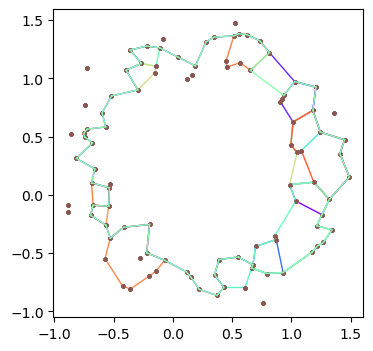

In [66]:
cycles05 = info_cycles(all_simplices05, diagram05)

plt.figure(figsize=(4,4))
draw_cycles(points05,cycles05)

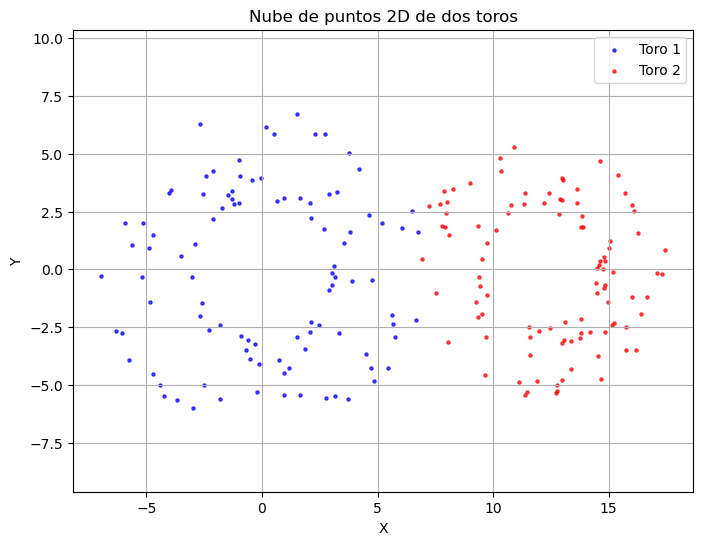

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar puntos en un toro proyectado en 2D
def generate_torus_points_2d(R, r, num_points, center=(0, 0)):
    u = np.random.uniform(0, 2 * np.pi, num_points)  # Ángulo u
    v = np.random.uniform(0, 2 * np.pi, num_points)  # Ángulo v
    x = (R + r * np.cos(v)) * np.cos(u) + center[0]
    y = (R + r * np.cos(v)) * np.sin(u) + center[1]
    return np.vstack((x, y)).T  # Nube de puntos (x, y)

# Parámetros del primer toro
R1, r1 = 5, 2  # Radio mayor y menor
center1 = (0, 0)  # Centro del primer toro
num_points = 100  # Número de puntos

# Parámetros del segundo toro
R2, r2 = 4, 1.5  # Radio mayor y menor
center2 = (12, 0)  # Centro del segundo toro (desplazado en x)

# Generar puntos para ambos toros
torus1_points = generate_torus_points_2d(R1, r1, num_points, center=center1)
torus2_points = generate_torus_points_2d(R2, r2, num_points, center=center2)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(torus1_points[:, 0], torus1_points[:, 1], color='blue', s=5, label="Toro 1", alpha=0.7)
plt.scatter(torus2_points[:, 0], torus2_points[:, 1], color='red', s=5, label="Toro 2", alpha=0.7)

# Configuración del gráfico
plt.title("Nube de puntos 2D de dos toros")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axis("equal")  # Escala igual en ambos ejes
plt.grid(True)
plt.show()


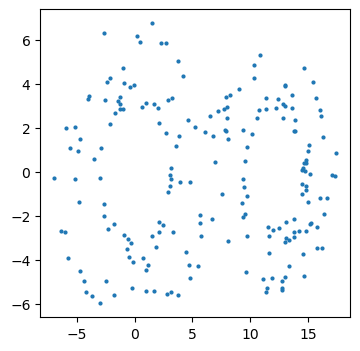

In [68]:
points = np.vstack((torus1_points, torus2_points))

plt.figure(figsize=(4,4))
visualize_points(points)

In [69]:
all_simplices, diagram = VR(points, threshold_max(points))

╒══════════╤══════════╤══════════╤══════════╤═════════════╕
│ Cycle    │ Length   │ Birth    │ Death    │ Life time   │
╞══════════╪══════════╪══════════╪══════════╪═════════════╡
│ cycle 1  │ 6        │ 0.665728 │ 0.7122   │ 0.0464721   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 2  │ 6        │ 0.747569 │ 0.843421 │ 0.0958524   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 3  │ 5        │ 0.83248  │ 0.873072 │ 0.0405918   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 4  │ 7        │ 0.840656 │ 0.846375 │ 0.00571906  │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 5  │ 5        │ 0.982055 │ 1.07206  │ 0.0900025   │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 6  │ 6        │ 1.0608   │ 1.35779  │ 0.296988    │
├──────────┼──────────┼──────────┼──────────┼─────────────┤
│ cycle 7  │ 7        │ 1.06119  │ 1.22544  │ 0.164257    │
├──────────┼──────────┼──────────┼──────

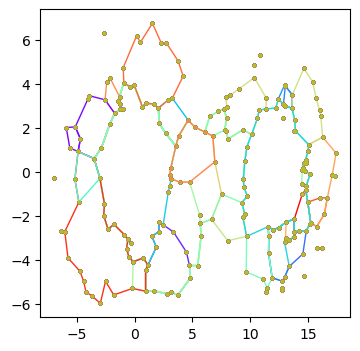

In [70]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points,cycles)

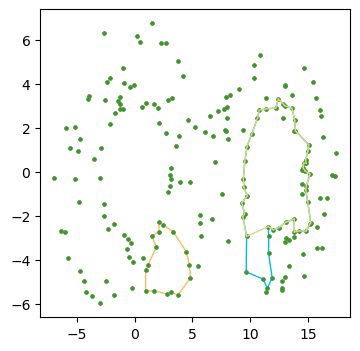

In [71]:
plt.figure(figsize=(4,4))
draw_cycles(points,[cycles[14],cycles[18],cycles[26]])

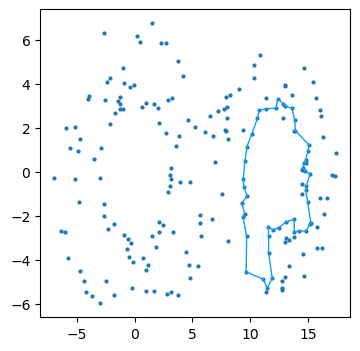

In [72]:
# El ciclo cycle[18] es largo pero dura poco: longitud = 51, nace = 1.72496, muere = 1.79953, tiempo de vida = 0.0745711
# Es homológo a cycle[14]
plt.figure(figsize=(4,4))
draw_cycles(points,[cycles[18]])

In [73]:
simplify(cycles[14]+cycles[18])

[[0, 82],
 [0, 45],
 [6, 88],
 [12, 44],
 [6, 37],
 [12, 37],
 [11, 47],
 [11, 60],
 [44, 47],
 [45, 88],
 [54, 82],
 [19, 54],
 [10, 19],
 [60, 62],
 [10, 63],
 [62, 63],
 [125, 139],
 [139, 184],
 [141, 189],
 [184, 189],
 [143, 163],
 [142, 143],
 [138, 163],
 [141, 160],
 [138, 160],
 [142, 175],
 [125, 147],
 [122, 147],
 [122, 156],
 [135, 181],
 [110, 135],
 [137, 181],
 [128, 137],
 [170, 187],
 [166, 170],
 [114, 187],
 [128, 129],
 [114, 129],
 [134, 172],
 [107, 134],
 [107, 192],
 [110, 172],
 [156, 183],
 [145, 183],
 [123, 145],
 [153, 167],
 [123, 167],
 [152, 185],
 [153, 185],
 [155, 192],
 [152, 194],
 [155, 194],
 [159, 166],
 [105, 159],
 [105, 158],
 [118, 157],
 [113, 157],
 [158, 176],
 [117, 176],
 [113, 117],
 [131, 175],
 [118, 197],
 [131, 197]]

In [74]:
borde_chain([[111,154,153],[111,153,123]])

[[111, 154], [154, 153], [111, 123], [153, 123]]

In [75]:
for interval in diagram:
    if interval[0]==1:
        print(interval)

(1, (1.5747672571391287, 5.327746028825922))
(1, (1.6117711825276952, 4.511076920524167))
(1, (1.8150035081167724, 3.14801499786576))
(1, (1.8400030934808902, 3.0258549563085406))
(1, (1.4571315109900078, 2.6253997391018147))
(1, (1.5755321336051045, 2.6286360920538625))
(1, (1.7018242282220566, 2.5577315648722334))
(1, (1.6869506445471854, 2.510148460108546))
(1, (1.738276621065398, 2.3966216005056578))
(1, (1.3773187461433039, 2.0115610147520138))
(1, (1.560041365773336, 2.191282343036121))
(1, (1.180137552021611, 1.7743721737575089))
(1, (1.4272259680385906, 2.003350971130034))
(1, (1.8049325787304904, 2.1875543417328545))
(1, (1.0608039632899042, 1.3577922718343902))
(1, (1.212059478376424, 1.416533869804752))
(1, (1.91286713455534, 2.1171865713663314))
(1, (2.372747016813552, 2.5398352745614496))
(1, (1.0611878002441257, 1.22544430650346))
(1, (1.6988136983224678, 1.8112891018397352))
(1, (0.7475687581493066, 0.8434211916805169))
(1, (0.9820552541361245, 1.0720577529726483))
(1, (

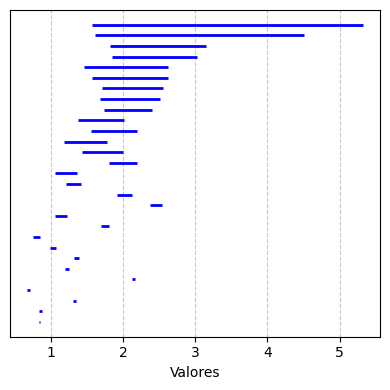

In [76]:
plt.figure(figsize=(4,4))
draw_barcode(diagram,'dim1')

In [77]:
#Según el AT-model nuestro:
#la barra (1, (1.6129510229500463, 4.906080111407975)) representa un ciclo representativo de 48 aristas 
#la barra (1, (1.7249583371973867, 1.7995294413798861)) representa un ciclo representativo de 51 aristas (el más largo)
#ambos ciclos son homólogos

# Example (datasaurus):

In [79]:
!pip install ripser
!pip install persim


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
import pandas as pd
import seaborn as sns
from ripser import ripser
import persim
import math
import csv

In [81]:
datasaurus_data = pd.read_csv('DataSaurus/archive/datasaurus.csv')

C:\Users\belenmg\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


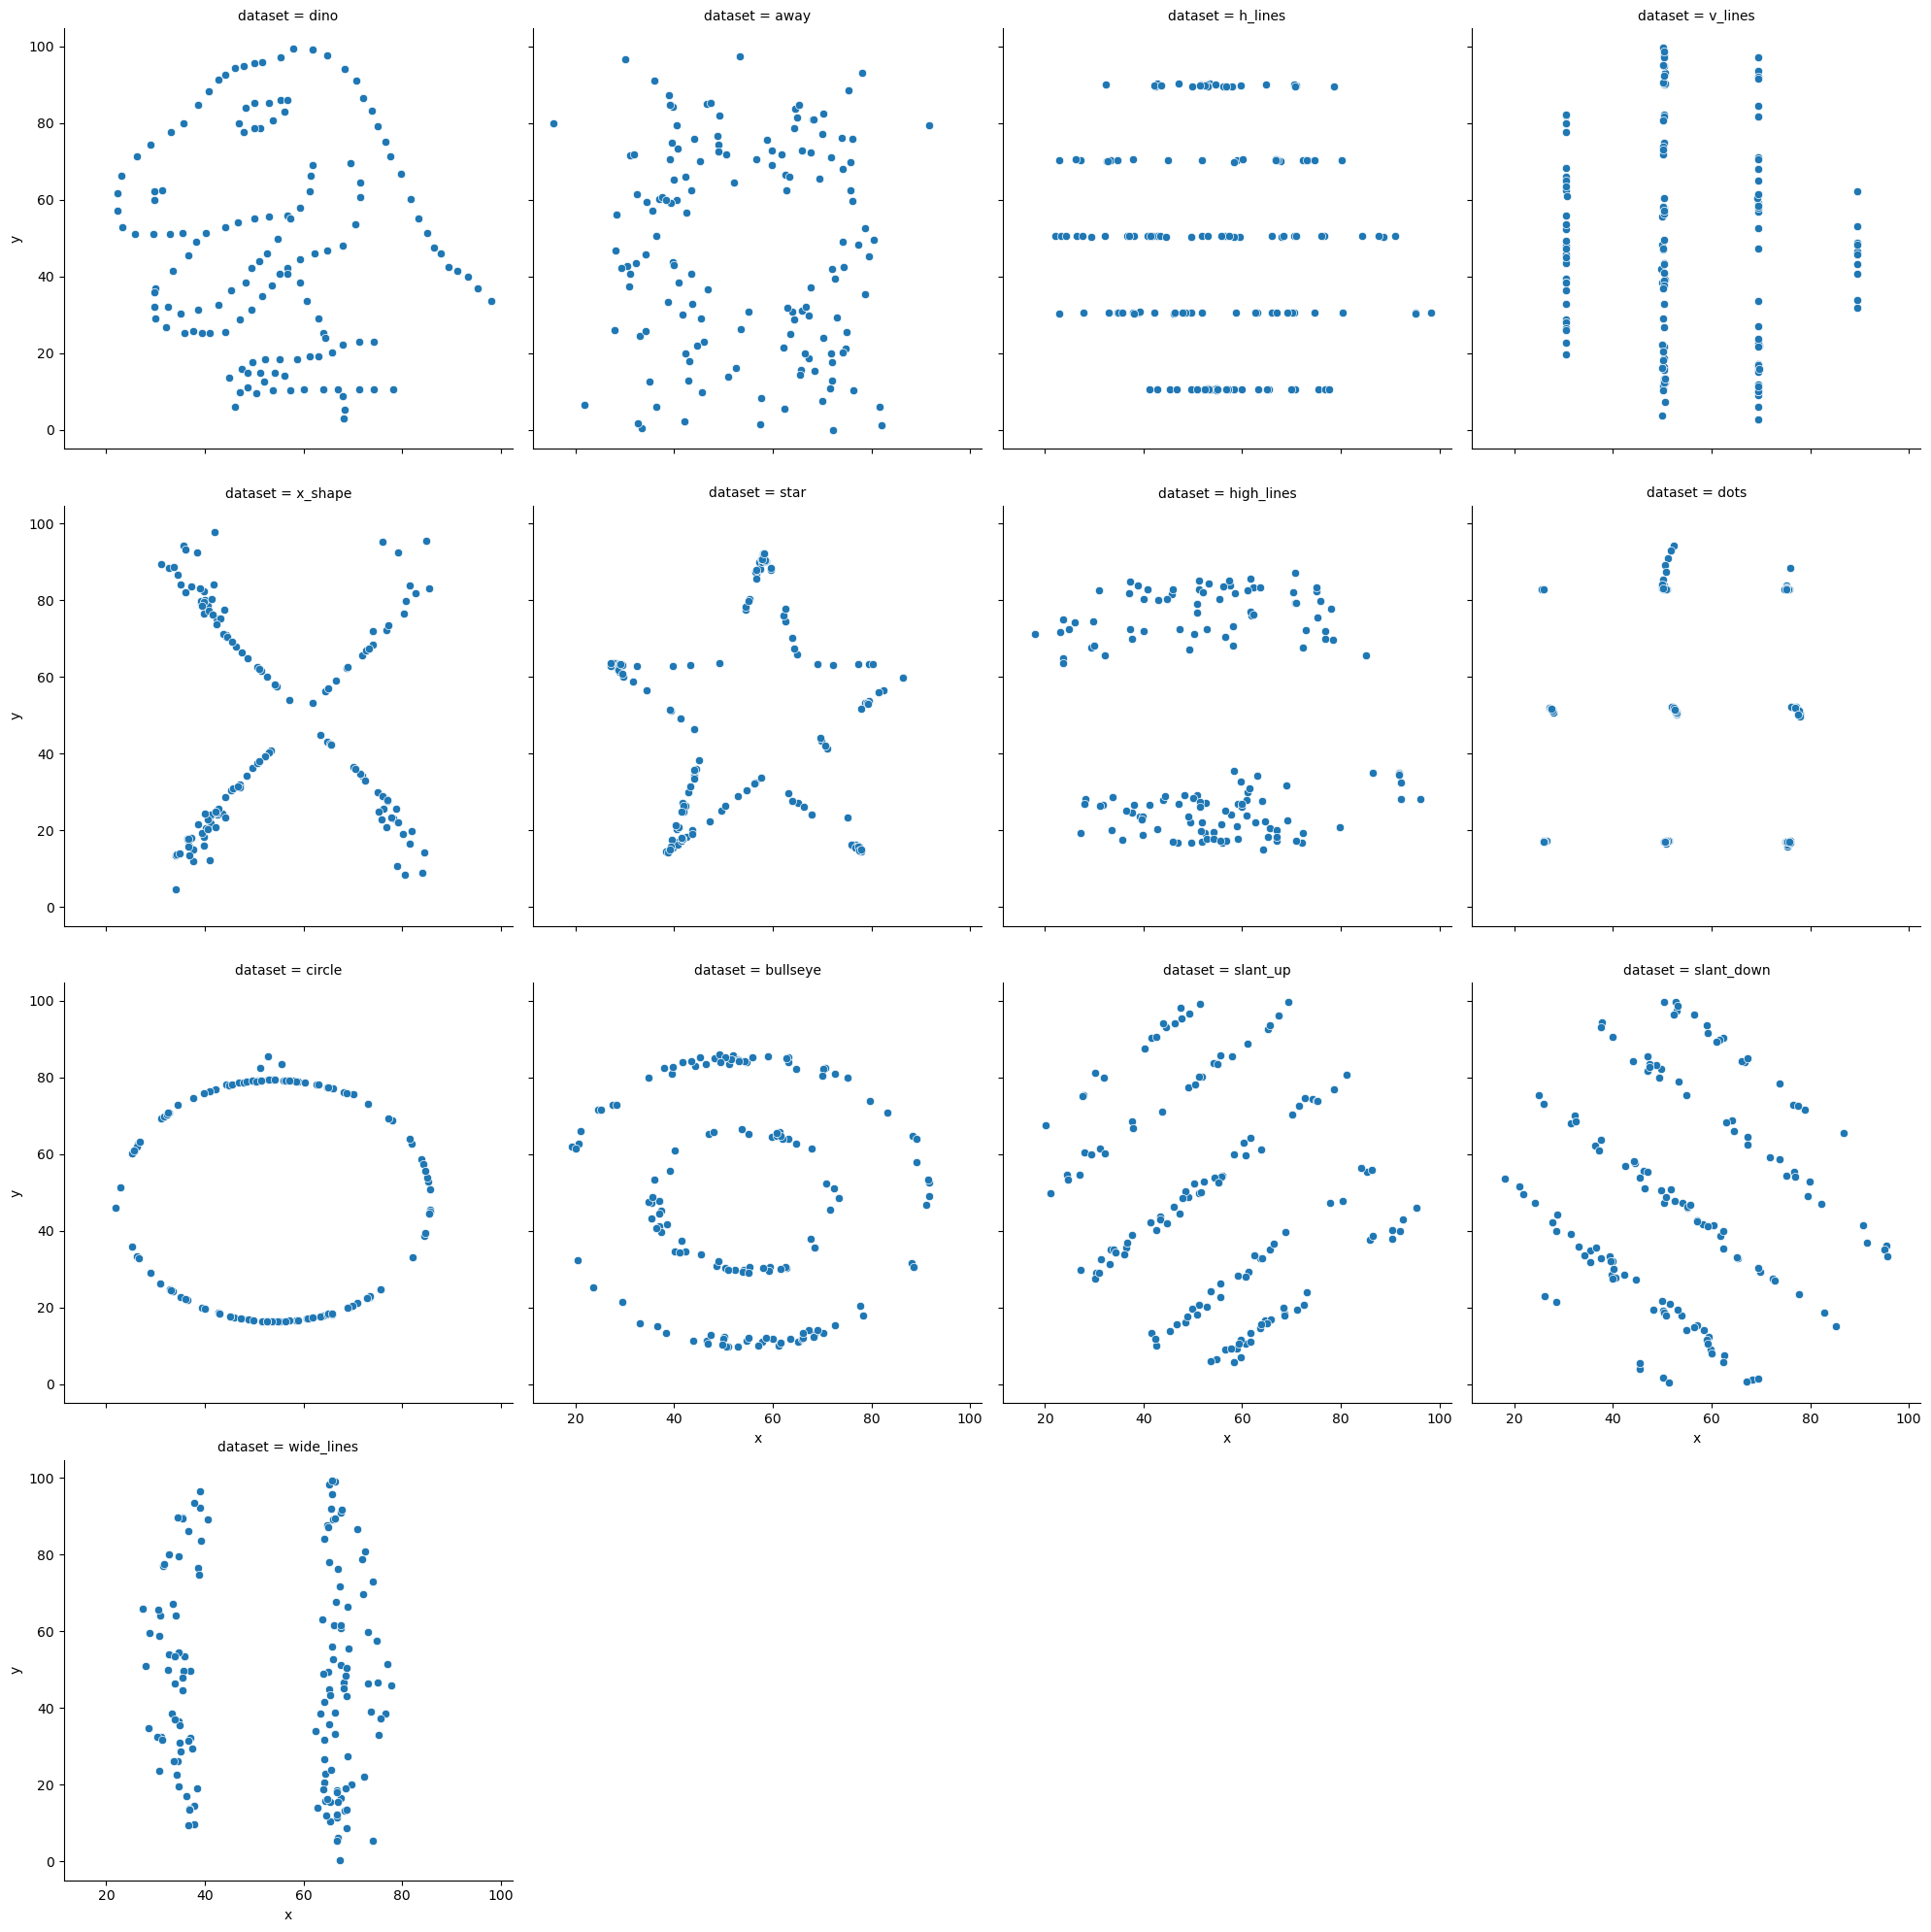

In [82]:
sns.relplot(data=datasaurus_data, x='x', y='y', col='dataset', col_wrap=4)

In [83]:
points = pd.read_csv('DataSaurus/archive/datasaurus.csv',  sep=',',  comment='#').values
points = np.delete(points, 0, axis=1)

In [84]:
points_dino = points[0:142,:]

In [85]:
points_dino2 = points_dino.astype(int)

In [86]:
len(points_dino2)

142

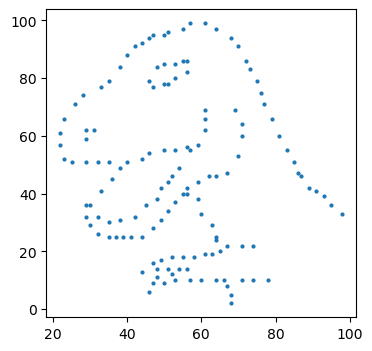

In [87]:
plt.figure(figsize=(4,4))
visualize_points(points_dino2)

In [88]:
threshold_max(points_dino2)

97.62171889492625

In [89]:
all_simplices, diagram = VR(points_dino2, 10)

╒══════════╤══════════╤═════════╤═════════╤═════════════╕
│ Cycle    │ Length   │ Birth   │ Death   │ Life time   │
╞══════════╪══════════╪═════════╪═════════╪═════════════╡
│ cycle 1  │ 6        │ 3.16228 │ 4.24264 │ 1.08036     │
├──────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 2  │ 5        │ 4.12311 │ 5       │ 0.876894    │
├──────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 3  │ 5        │ 4.12311 │ 4.47214 │ 0.34903     │
├──────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 4  │ 17       │ 5       │ 7.07107 │ 2.07107     │
├──────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 5  │ 17       │ 5       │ 5.09902 │ 0.0990195   │
├──────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 6  │ 11       │ 5.38516 │ 6.40312 │ 1.01796     │
├──────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 7  │ 11       │ 5.38516 │ 6.40312 │ 1.01796     │
├──────────┼──────────┼─────────┼─────────┼─────────────┤
│ cycle 8  │ 2

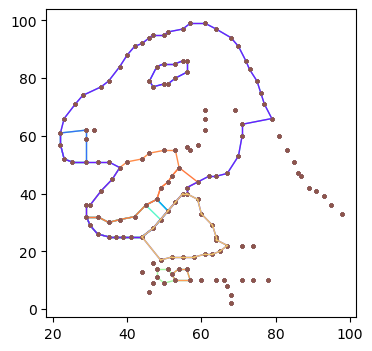

In [90]:
cycles = info_cycles(all_simplices, diagram)

plt.figure(figsize=(4,4))
draw_cycles(points_dino2,cycles)

In [91]:
for interval in diagram:
    if interval[0]==1:
        print(interval)

(1, (6.082762530298219, inf))
(1, (9.433981132056603, inf))
(1, (8.246211251235321, inf))
(1, (8.0, inf))
(1, (5.0, 7.0710678118654755))
(1, (3.1622776601683795, 4.242640687119285))
(1, (5.385164807134504, 6.4031242374328485))
(1, (5.385164807134504, 6.4031242374328485))
(1, (8.246211251235321, 9.219544457292887))
(1, (8.0, 8.94427190999916))
(1, (4.123105625617661, 5.0))
(1, (6.4031242374328485, 7.0710678118654755))
(1, (9.433981132056603, 10.0))
(1, (4.123105625617661, 4.47213595499958))
(1, (7.0710678118654755, 7.280109889280518))
(1, (5.0, 5.0990195135927845))


In [92]:
all_simplices, diagram = VR(points_dino2, 6)
f,g,phi,H,C = ATmodel2(all_simplices)

In [93]:
cycles2 = []
for h in H:
    if len(h) > 3 and len(h[0])==2:
        cycles2.append(h)
        print('Cycle:', h)

Cycle: [[31, 52], [51, 52], [50, 51], [49, 50], [48, 49], [136, 137], [47, 136], [48, 137], [46, 47], [45, 46], [44, 45], [35, 36], [38, 44], [37, 38], [36, 37], [34, 35], [31, 34]]
Cycle: [[64, 65], [73, 74], [72, 73], [71, 72], [64, 74], [70, 71], [69, 70], [68, 69], [67, 68], [66, 67], [65, 66]]
Cycle: [[33, 54], [31, 32], [32, 33], [53, 54], [52, 53], [51, 52], [50, 51], [49, 50], [48, 49], [136, 137], [47, 136], [48, 137], [46, 47], [45, 46], [44, 45], [35, 36], [38, 44], [37, 38], [36, 37], [34, 35], [31, 34]]


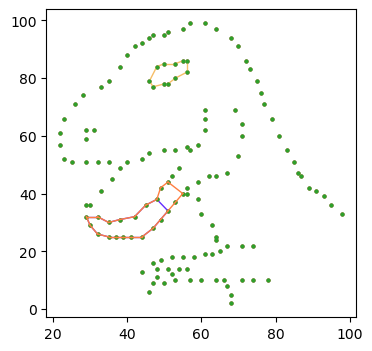

In [94]:
plt.figure(figsize=(4,4))
draw_cycles(points_dino2,cycles2)

In [95]:
C

{'[[124, 125], [121, 124], [116, 121], [120, 125], [116, 117], [117, 120]]': (3.1622776601683795,
  3.605551275463989),
 '[[120, 124], [116, 117], [117, 120], [121, 124], [116, 121]]': (3.605551275463989,
  4.123105625617661),
 '[[111, 118], [114, 116], [113, 114], [112, 113], [111, 112], [116, 117], [118, 120], [117, 120]]': (4.123105625617661,
  4.47213595499958),
 '[[120, 121], [116, 117], [117, 120], [116, 121]]': (4.123105625617661,
  4.242640687119285),
 '[[119, 126], [118, 119], [118, 120], [125, 126], [120, 125]]': (4.123105625617661,
  5.0),
 '[[37, 46], [45, 46], [44, 45], [38, 44], [37, 38]]': (5.0,
  5.0990195135927845),
 '[[31, 52], [51, 52], [50, 51], [49, 50], [48, 49], [136, 137], [47, 136], [48, 137], [46, 47], [45, 46], [44, 45], [35, 36], [38, 44], [37, 38], [36, 37], [34, 35], [31, 34]]': (5.0,
  'inf'),
 '[[33, 55], [31, 32], [32, 33], [53, 54], [52, 53], [51, 52], [50, 51], [55, 98], [54, 98], [49, 50], [48, 49], [136, 137], [47, 136], [48, 137], [46, 47], [45, 46

In [96]:
for interval in diagram:
    if interval[0]==1:
        print(interval)

(1, (5.385164807134504, inf))
(1, (5.385164807134504, inf))
(1, (5.0, inf))
(1, (3.1622776601683795, 4.242640687119285))
(1, (4.123105625617661, 5.0))
(1, (4.123105625617661, 4.47213595499958))
(1, (5.0, 5.0990195135927845))


In [97]:
import gudhi
import random
import itertools
from matplotlib import pyplot as plt

n = 100 #number of random points to generate
points = [(random.random(), random.random()) for _ in range(n)]
points = points_dino2

In [98]:
gudhi_complex = gudhi.AlphaComplex(points).create_simplex_tree()
alpha_complex = {tuple(sorted(simplex)) : radius for simplex, radius in gudhi_complex.get_filtration()}

In [99]:
#rips_complex = gudhi.RipsComplex(points = points, max_edge_length = threshold_max(points))
#simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
#all_simplices = list(simplex_tree.get_filtration())

In [100]:
boundary_matrix = {simplex : set(itertools.combinations(simplex, len(simplex)-1))-{tuple()} for simplex in alpha_complex}

In [101]:
R = { k : v for k,v in boundary_matrix.items()}
V = { k : {k} for k in boundary_matrix}
lowinv = {} # lowinv[i]=index of column with the lowest 1 at i
order_function = lambda s: (alpha_complex[s], s)

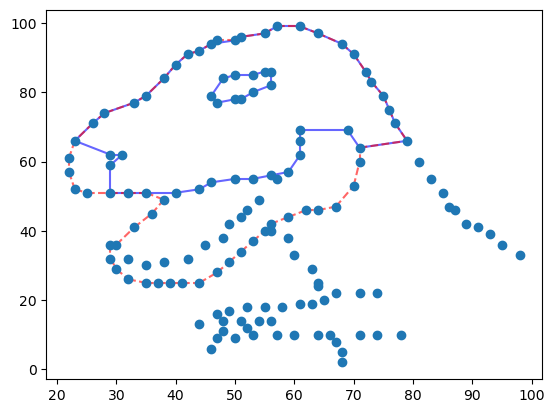

In [102]:
for s in sorted(R, key=order_function):
    t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    while t!=-1:
        R[s] = R[t]^R[s] # symmetric difference of t-th and s-th columns
        V[s] = V[t]^V[s]
        t = lowinv.get(max(R[s], key=order_function),-1) if len(R[s])!=0 else -1
    if len(R[s])!=0:
        lowinv[max(R[s], key=order_function)] = s

loops = [bar for bar in lowinv.items() if len(bar[0])==2]
longest_loop = max(loops, key=lambda bar: alpha_complex[bar[1]]-alpha_complex[bar[0]])
representative_1 = R[longest_loop[1]]
representative_2 = V[longest_loop[0]]

for edge in representative_1:
    plt.plot( *zip(points[edge[0]], points[edge[1]]), '-', color='blue', alpha=.6 )
for edge in representative_2:
    plt.plot( *zip(points[edge[0]], points[edge[1]]), '--', color='red', alpha=.6 )
plt.plot(*zip(*points),'o')
plt.show()

In [103]:
len(representative_1)

53

In [104]:
len(representative_2)

59